In [1]:
# In this notebook we gonna build a MLP model in other to classify images from MNIST dataset

# Required step for this project:
A)- Load and visualize the data
B)- Define a neural network
C)- Train the model
D)- Evaluate the performance of the trained model on a test dataset


In [2]:
# Import statements
import torch
import numpy as np

# Load and visualize the data

In [3]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# Number samples per batch to use
batch_size = 20
#Convert data to torch.FloatTensor
transform = transforms.ToTensor()

# Choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                           download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                          download=True, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



# Visualize a Batch of Training Data

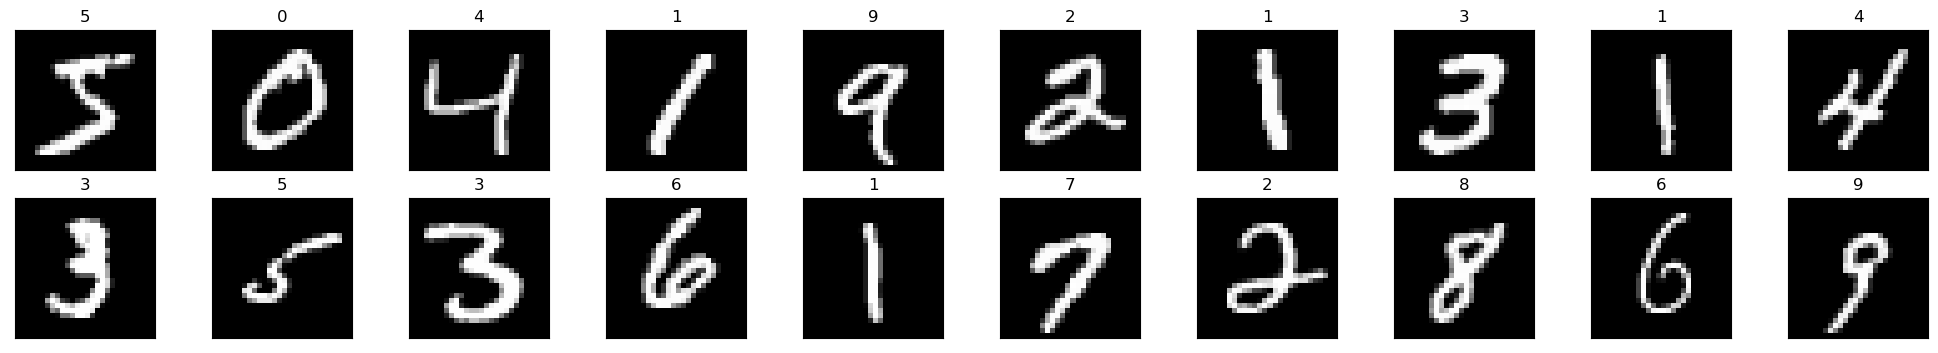

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images =images.numpy()


# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

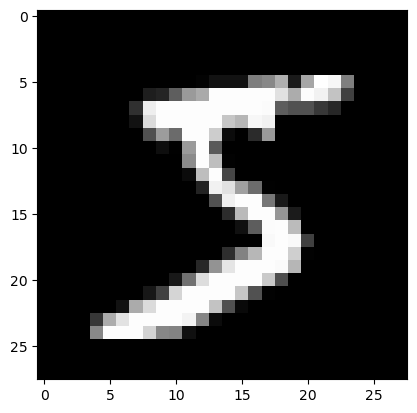

In [9]:
plt.imshow(images[0].reshape(28, 28), cmap='gray')


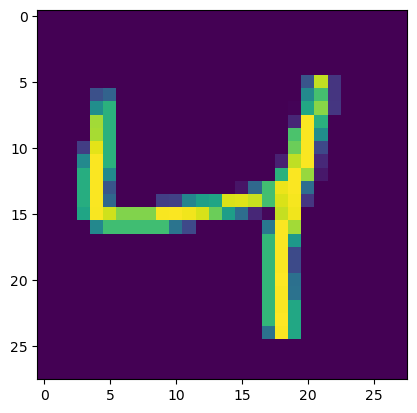

In [11]:
plt.imshow(images[2].reshape(28, 28))


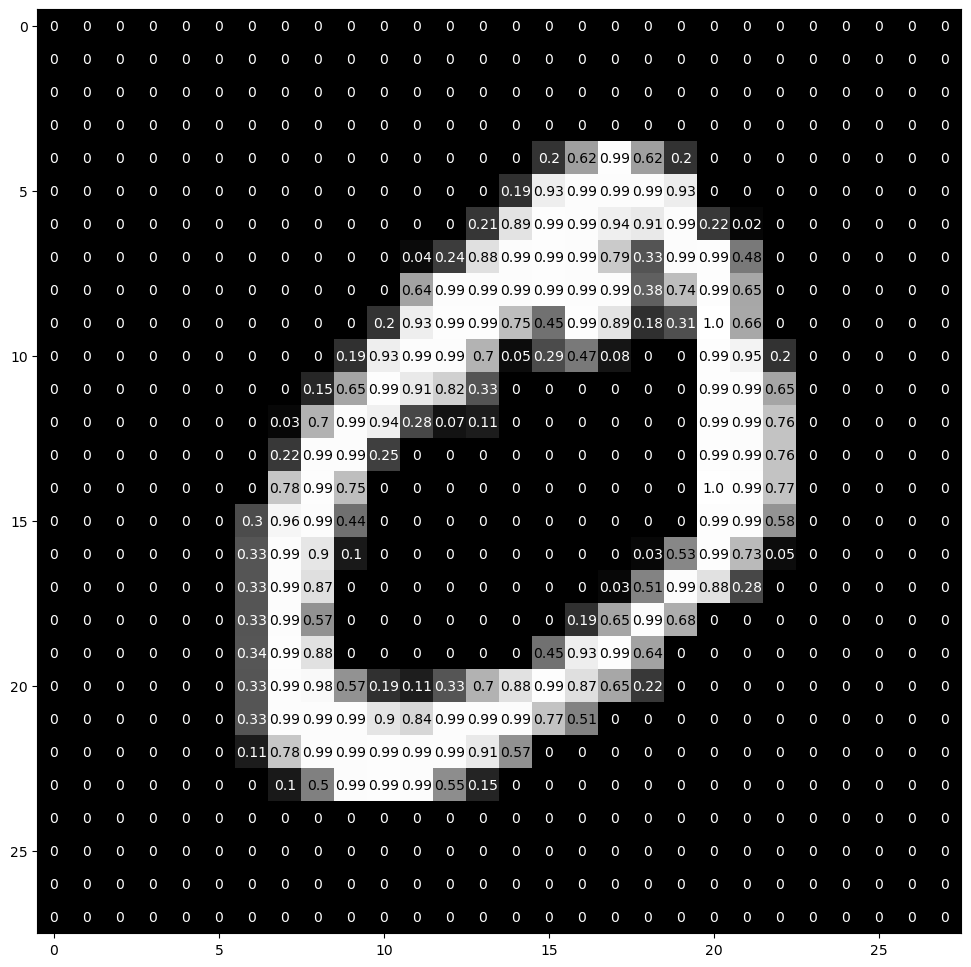

In [12]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# Network architecture

In [14]:
import torch.nn as nn
import torch.nn.functional as F

#The nn architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Number of hidden nodes in each layer
        hidden_1 = 512
        hidden_2 = 512
        #Linear layer (# linear layer (784 -> hidden_1))
        self.fc1 = nn.Linear(28*28, hidden_1)
        #Linear layer
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        #flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        
        return x
        
        

In [16]:
# Initialize the model(NN)
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [17]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# TRAINING THE NETWORK

<!-- TRAINING STEPS:

Clear the gradients of all optimized variables
Forward pass: compute predicted outputs by passing inputs to the model
Calculate the loss
Backward pass: compute gradient of the loss with respect to model parameters
Perform a single optimization step (parameter update)
Update average training loss -->

In [18]:
# Training steps:
# Clear the gradients of all optimized variables
# Forward pass: compute predicted outputs by passing inputs to the model
# Calculate the loss
# Backward pass: compute gradient of the loss with respect to model parameters
# Perform a single optimization step (parameter update)
# Update average training loss

In [20]:
n_epochs = 50

model.train()

for epoch in range(n_epochs):
    train_loss = 0
    
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
        
        #Calculate average loss over an epoch
        train_loss = train_loss /len(train_loader.dataset)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))


Epoch: 1 	Training Loss: 0.000770
Epoch: 1 	Training Loss: 0.000770
Epoch: 1 	Training Loss: 0.000764
Epoch: 1 	Training Loss: 0.000772
Epoch: 1 	Training Loss: 0.000762
Epoch: 1 	Training Loss: 0.000772
Epoch: 1 	Training Loss: 0.000768
Epoch: 1 	Training Loss: 0.000764
Epoch: 1 	Training Loss: 0.000771
Epoch: 1 	Training Loss: 0.000764
Epoch: 1 	Training Loss: 0.000766
Epoch: 1 	Training Loss: 0.000764
Epoch: 1 	Training Loss: 0.000765
Epoch: 1 	Training Loss: 0.000769
Epoch: 1 	Training Loss: 0.000763
Epoch: 1 	Training Loss: 0.000767
Epoch: 1 	Training Loss: 0.000763
Epoch: 1 	Training Loss: 0.000763
Epoch: 1 	Training Loss: 0.000761
Epoch: 1 	Training Loss: 0.000765
Epoch: 1 	Training Loss: 0.000767
Epoch: 1 	Training Loss: 0.000765
Epoch: 1 	Training Loss: 0.000765
Epoch: 1 	Training Loss: 0.000765
Epoch: 1 	Training Loss: 0.000764
Epoch: 1 	Training Loss: 0.000766
Epoch: 1 	Training Loss: 0.000769
Epoch: 1 	Training Loss: 0.000763
Epoch: 1 	Training Loss: 0.000762
Epoch: 1 	Trai

# Testing the training network

In [21]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    
    _,pred = torch.max(output, 1)
    
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] +=1
        
# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.056664

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 97% (1007/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 98% (879/892)
Test Accuracy of     6: 98% (940/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (987/1009)

Test Accuracy (Overall): 98% (9826/10000)


In [ ]:
# Visualize some testing results images

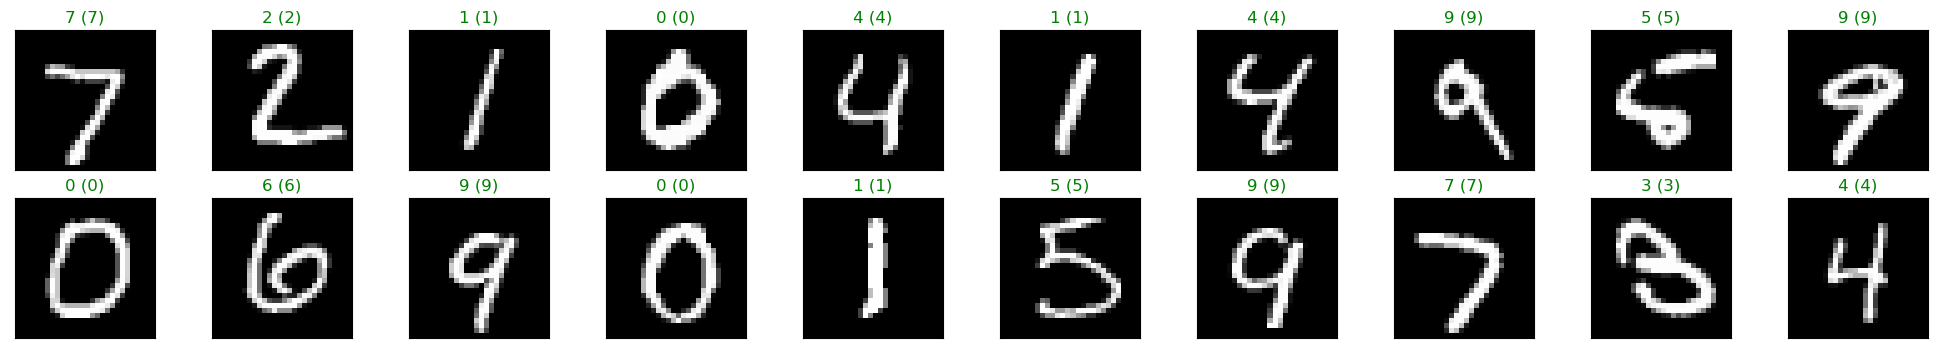

In [25]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))